# SymPy

![img](https://i.ibb.co/30ZsPH7/Sympy-logo-svg.png)

Um **Computer Algebra System** (CAS) é um programa que permite a computação de expressões matemáticas. Em contraste com uma simples calculadora, um CAS resolve esses problemas não numericamente, mas usando expressões simbólicas, como variáveis, funções, polinômios e matrizes.

Todos os CAS têm essencialmente a mesma funcionalidade. Isso significa que entendendo como um deles funciona, você será capaz de usar todos
os outros também. Sistemas comerciais bem conhecidos incluem Maple, MATLAB e Mathematica. Os gratuitos são Octave, Magma e **[SymPy](https://www.sympy.org/en/index.html)**.

## Simbólico vs Numérico

Em um CAS simbólico, números e operações são expressos simbolicamente, então as respostas obtidas são exatas. Por exemplo o número $\sqrt{2}$ é representado no SymPy como o objeto `sqrt(2)`.

Em um sistema de álgebra computacional numérico, como o Octave, o número $\sqrt{2}$ é representado como a aproximação **1.4142135623730951** (float). Na maioria dos casos, isso é bom, mas essas aproximações podem levar a problemas.

## Tutorial

Para começar a usar SymPy, devemos importar o módulo:

In [7]:
from sympy import *

Para obtermos um *output* formatado em $\LaTeX$ bonito, executamos:

In [8]:
init_printing()

Obtendo a raiz quadrada de **2** de forma numérica:

In [9]:
import math

math.sqrt(2)

Obtendo a raiz quadrada de 2 de forma simbólica:

In [10]:
sqrt(2)

### Variáveis Simbólicas

No SymPy, precisamos criar símbolos para as variáveis com as quais queremos trabalhar. Podemos criar um novo símbolo usando a classe **Symbol**:

In [11]:
x = Symbol('x')

Construindo expressões:

In [12]:
(pi + x)**2

In [13]:
3 + x**3 - 2*x

Maneira alternativa de definir símbolos:

In [14]:
a, b, c = symbols("a, b, c")

Podemos confirmar que estamos lidando com um objeto **Symbol**:

In [15]:
type(a)

sympy.core.symbol.Symbol

Podemos adicionar suposições aos símbolos ao criá-los:

In [16]:
x = Symbol('x', real=True)
x.is_imaginary

False

In [17]:
x = Symbol('x', positive=True)
x > 0

True

### Números Complexos

A unidade imaginária é denotada por $I$ em Sympy.

In [18]:
1+1*I

In [19]:
I**2

In [20]:
sqrt(-1)

In [21]:
sqrt(-1) * sqrt(-1)

In [22]:
(x * I + 1)**2

### Números Racionais

Existem três tipos numéricos diferentes no SymPy: 

- **Real** 
- **Rational**
- **Integer**

In [23]:
r1 = Rational(4,5)
r2 = Rational(5,4)

In [24]:
r1

In [25]:
r2

In [26]:
r1/r2

Para obter uma representação exata, podemos **'sympify'** a expressão usando a função de atalho **S()**:

In [133]:
S('1/7')

In [134]:
S('1/3') * S('1/3')

In [135]:
S('2/3') + S('1/3')

### Avaliação Numérica

SymPy usa uma biblioteca para precisão arbitrária como backend numérico e tem expressões SymPy predefinidas para várias constantes matemáticas, como: $\pi$, $e$, $\infty$ para infinito.

Para avaliar uma expressão numericamente, podemos usar a função **evalf** ou **N**. Ela leva um argumento **n** que especifica o número de dígitos significativos.

In [28]:
pi.evalf(n=100)

**N** funciona exatamente como **evalf**:

In [48]:
N(E,100)

Quando avaliamos numericamente as expressões algébricas, geralmente queremos substituir um símbolo por um valor numérico. No SymPy, fazemos isso usando a função **subs**:

In [166]:
y = (x + 3)**2
y

In [167]:
y.subs(x, 2)

Para substituir um determinado valor em uma expressão, chamamos o método **subs()**, passando um dicionário Python (`{chave: valor}`).

In [140]:
expr = sin(x) + cos(y)
expr

In [141]:
expr.subs({x:1,y:2})

In [142]:
expr.subs({x:1,y:2}).n()

A função **subs** também pode ser usada para substituir símbolos e expressões:

In [51]:
y.subs(x, a+pi)

Também podemos combinar a evolução numérica de expressões com arrays NumPy:

In [54]:
import matplotlib.pyplot as plt
import numpy

In [53]:
x_vec = numpy.arange(0, 10, 0.1)
y_vec = numpy.array([N(((x + pi)**2).subs(x, xx)) for xx in x_vec])

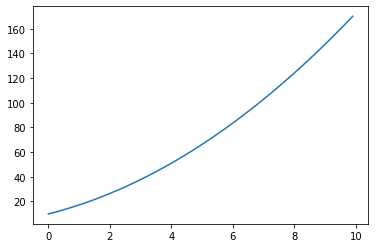

In [55]:
fig, ax = plt.subplots()
ax.plot(x_vec, y_vec);

No entanto, esse tipo de evolução numérica pode ser muito lenta e há uma maneira muito mais eficiente de fazer isso.

Usar a função **lambdify** para "compilar" uma expressão SymPy em uma função que é muito mais eficiente para avaliar numericamente:

O primeiro argumento é uma lista de variáveis que **f** será uma função de: neste caso, apenas **x** -> **f(x)**

In [59]:
f = lambdify([x], (x + pi)**2, 'numpy')

Agora podemos passar diretamente um array numpy e **f(x)** é avaliado de forma eficiente:

In [60]:
y_vec = f(x_vec)

A aceleração ao usar funções "lambdified" em vez de avaliação numérica direta pode ser significativa, muitas vezes em várias ordens de magnitude. 

Mesmo neste exemplo simples, conseguimos uma velocidade significativa:

In [62]:
%%timeit

y_vec = numpy.array([N(((x + pi)**2).subs(x, xx)) for xx in x_vec])

24.3 ms ± 4.45 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [63]:
%%timeit

y_vec = f(x_vec)

2.6 µs ± 38.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### Manipulações Algébricas

Um dos principais usos de um CAS é realizar manipulações algébricas de expressões. 

Por exemplo, podemos querer expandir um produto, fatorar uma expressão ou simplificar uma expressão. As funções para fazer essas operações básicas no SymPy são demonstradas nesta seção.

#### Expandir e Fatorar

Os primeiros passos em uma manipulação algébrica:

In [64]:
(x+1)*(x+2)*(x+3)

Expandindo:

In [65]:
expand((x+1)*(x+2)*(x+3))

In [137]:
expand((x-4)*(x+2))

A função **expand** recebe uma série de argumentos de palavras-chave que podemos dizer às funções que tipo de expansões queremos que sejam realizadas. 

Por exemplo, para expandir expressões trigonométricas, usamos o argumento de palavra-chave `trig = True`:

In [66]:
sin(a+b)

In [67]:
expand(sin(a+b), trig=True)

Consulte `help(expand)` para uma explicação detalhada dos vários tipos de expansões que as funções de expansão podem realizar.

In [69]:
# help(expand)

O oposto da expansão do produto é, obviamente, o **factoring**. O fator uma expressão no SymPy usa a função **factor**:

In [70]:
factor(x**3 + 6 * x**2 + 11*x + 6)

In [139]:
factor(x**2 -2*x -8)

#### Simplificar

O **simplify** tenta simplificar uma expressão em uma expressão bonita, usando várias técnicas. Alternativas mais específicas para as funções simplificar também existem: **trigsimp**, **powsimp**, **logcombine**, etc.

Os usos básicos dessas funções são os seguintes.

**simplify** expande um produto:

In [71]:
simplify((x+1)*(x+2)*(x+3))

**simplify** usa identidades trigonométricas:

In [72]:
simplify(sin(a)**2 + cos(a)**2)

In [73]:
simplify(cos(x)/sin(x))

In [74]:
simplify(sin(x)/tan(x))

In [146]:
simplify(sin(x) * cos(y) + cos(x)*sin(y))

#### apart e together

Para manipular expressões simbólicas de frações, podemos usar as funções **apart** e **together**:

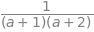

In [75]:
f1 = 1/((a+1)*(a+2))
f1

In [77]:
apart(f1)

In [78]:
f2 = 1/(a+2) + 1/(a+3)
f2

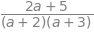

In [79]:
together(f2)

Simplificar geralmente combina frações, mas não fatora:

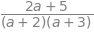

In [80]:
simplify(f2)

### Cálculo

Além das manipulações algébricas, o outro uso principal do CAS é realizar cálculos, como derivadas e integrais de expressões algébricas.

#### Diferenciação

A diferenciação geralmente é simples. Usamos a função **diff**. 

O primeiro argumento é a expressão para tirar a derivada, e o segundo argumento é o símbolo pelo qual tirar a derivada:

In [81]:
y

In [83]:
diff(y, x)

Para derivadas de ordem superior, podemos fazer:

In [84]:
diff(y**2, x, x)

In [85]:
diff(y**2, x, 2)

Para calcular a derivada de uma expressão multivariada, podemos fazer:

In [86]:
x, y, z = symbols("x,y,z")

In [88]:
f = sin(x*y) + cos(y*z)
f

In [89]:
diff(f, x, 1, y, 2)

Operadores não avaliados:

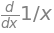

In [155]:
Derivative(1/x, x)

#### Integração

A integração é feita de maneira semelhante:

In [90]:
f

In [91]:
integrate(f, x)

             ⎛⎧-cos(x⋅y)            ⎞
             ⎜⎪──────────  for y ≠ 0⎟
x⋅cos(y⋅z) + ⎜⎨    y                ⎟
             ⎜⎪                     ⎟
             ⎝⎩    0       otherwise⎠

Ao fornecer limites para a variável de integração, podemos avaliar integrais definidas:

In [92]:
integrate(f, (x, -1, 1))

E também integrais impróprias:

In [93]:
integrate(exp(-x**2), (x, -oo, oo))

Lembre-se: oo é a notação SymPy para infinito.

In [164]:
oo + 1

In [163]:
oo > 9999999

True

Operadores não avaliados:

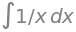

In [156]:
Integral(1/x, x)

### Somas e Produtos

Podemos avaliar somas e produtos usando as funções: '**Sum**'

In [94]:
n = Symbol("n")

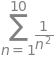

In [95]:
Sum(1/n**2, (n, 1, 10))

In [97]:
Sum(1/n**2, (n,1,10)).evalf()

In [98]:
Sum(1/n**2, (n,1,oo)).evalf()

Os produtos funcionam da mesma maneira:

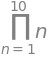

In [103]:
Product(n, (n, 1, 10)) # 10!

In [102]:
Product(n, (n, 1, 5)).evalf()

### Limites

Os limites podem ser avaliados usando a função **limit**. Por exemplo:

In [149]:
(1+1/n)**n

In [152]:
limit((1+1/n)**n, n, oo)

In [153]:
limit((1+1/n)**n, n, oo).n(15)

In [104]:
limit(sin(x)/x, x, 0)

In [108]:
limit(x**2, x, 15)

Podemos usar '**limit**' para verificar o resultado da derivação usando a função **diff**:

In [109]:
f

In [110]:
diff(f, x)

In [111]:
h = Symbol("h")

In [112]:
limit((f.subs(x, x+h) - f)/h, h, 0)

Podemos mudar a direção a partir da qual nos aproximamos do ponto limite usando o argumento de palavra-chave **dir**:

In [113]:
limit(1/x, x, 0, dir="+")

In [114]:
limit(1/x, x, 0, dir="-")

### Series

A expansão de series também é um dos recursos mais úteis de um CAS. 

No SymPy, podemos realizar uma expansão de series de uma expressão usando a função **series**:

In [115]:
series(exp(x), x)

Por padrão, ele expande a expressão em torno de $ x = 0 $, mas podemos expandir em torno de qualquer valor de $ x $ incluindo explicitamente um valor na chamada de função:

In [116]:
series(exp(x), x, 1)

E podemos definir explicitamente em que ordem a expansão da série deve ser realizada:

In [117]:
series(exp(x), x, 1, 10)

A expansão da série inclui a ordem de aproximação, o que é muito útil para acompanhar a ordem de validade quando fazemos cálculos com expansões de série de ordem diferente:

In [118]:
s1 = cos(x).series(x, 0, 5)
s1

In [119]:
s2 = sin(x).series(x, 0, 2)
s2

In [120]:
expand(s1 * s2)

Se quisermos nos livrar das informações de ordem, podemos usar o método **removeO**:

In [121]:
expand(s1.removeO() * s2.removeO())

### Álgebra Linear

#### Matrizes

Matrizes são definidas usando a classe **Matrix**:

In [122]:
m11, m12, m21, m22 = symbols("m11, m12, m21, m22")
b1, b2 = symbols("b1, b2")

In [123]:
A = Matrix([[m11, m12],[m21, m22]])
A

⎡m₁₁  m₁₂⎤
⎢        ⎥
⎣m₂₁  m₂₂⎦

In [124]:
b = Matrix([[b1], [b2]])
b

⎡b₁⎤
⎢  ⎥
⎣b₂⎦

Com instâncias de classe Matrix, podemos fazer as operações usuais de álgebra de matrizes:

In [125]:
A**2

⎡    2                               ⎤
⎢ m₁₁  + m₁₂⋅m₂₁    m₁₁⋅m₁₂ + m₁₂⋅m₂₂⎥
⎢                                    ⎥
⎢                                 2  ⎥
⎣m₁₁⋅m₂₁ + m₂₁⋅m₂₂   m₁₂⋅m₂₁ + m₂₂   ⎦

In [126]:
A * b

⎡b₁⋅m₁₁ + b₂⋅m₁₂⎤
⎢               ⎥
⎣b₁⋅m₂₁ + b₂⋅m₂₂⎦

E calcular determinantes e inversos, e assim por diante:

In [127]:
A.det()

In [128]:
A.inv()

⎡       m₂₂               -m₁₂       ⎤
⎢─────────────────  ─────────────────⎥
⎢m₁₁⋅m₂₂ - m₁₂⋅m₂₁  m₁₁⋅m₂₂ - m₁₂⋅m₂₁⎥
⎢                                    ⎥
⎢      -m₂₁                m₁₁       ⎥
⎢─────────────────  ─────────────────⎥
⎣m₁₁⋅m₂₂ - m₁₂⋅m₂₁  m₁₁⋅m₂₂ - m₁₂⋅m₂₁⎦

### Resolvendo Equações

Para resolver equações e sistemas de equações, podemos usar a função **solve**:

In [129]:
solve(x**2 - 1, x)

In [145]:
solve(x**2 + 2*x -8, x)

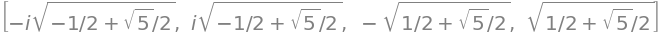

In [130]:
solve(x**4 - x**2 - 1, x)

Sistemas de Equações:

In [131]:
solve([x + y - 1, x - y - 1], [x,y])

Em termos de outras expressões simbólicas:

In [132]:
solve([x + y - a, x - y - c], [x,y])